In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate

$$ f(x) = \frac{4}{\pi} \sum_{n=1,3,5,...}^{\infty} \frac{1}{n} sin(\frac{n\pi x}{L})  $$

$$ f(x) = \frac{8}{\pi} \sum_{n=1,3,5,...}^{\infty} \frac{1}{n^{2}} cos(\frac{n\pi x}{L}) $$

In [2]:
def f(x,n):
    m = 2*n - 1
    f = (4/np.pi) * (1/m) * np.sin( m*np.pi*x/L )
    return f

In [3]:
def f2(x,n):
    m = 2*n -1 
    f = (8/np.pi) * (1/m**2) * np.cos( m*np.pi*x/L )
    return f

In [9]:
L = np.pi
cicles = 5
x = np.linspace(0,2*cicles*L,100)

In [10]:
n = 1
nt = 15
F = 0

<IPython.core.display.Javascript object>


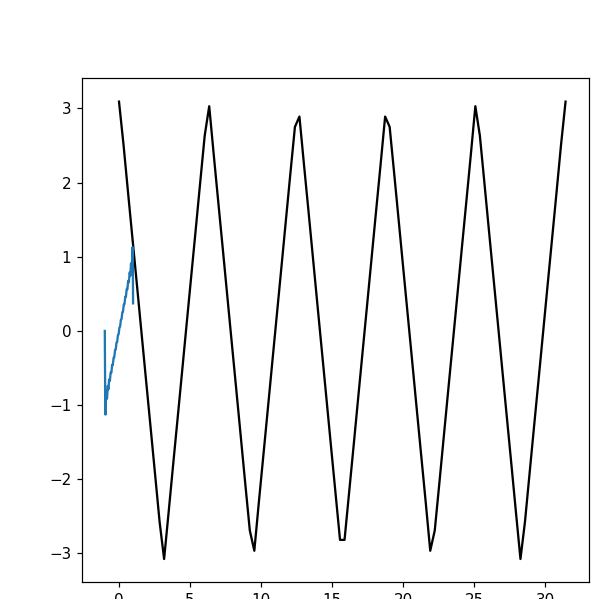

In [11]:
fig = plt.figure(figsize=(6,6))
camera = Camera(fig)

In [12]:
while n < nt:
    F += f2(x,n)
    plt.plot(x,F,c='k')
    camera.snap()
    n += 1 

In [13]:
animation = camera.animate()
animation.save('Fourier.mp4')

$$ y(t)=t,  \ -1 < t < 1  $$

$$ y(t) = \left\{ \begin{array}{cc}
1 & -1 < t < 0 \\
0 &  0 < t < 1 \\
\end{array}
\right.
$$

In [51]:
def f(t):
    #return t
    #return np.piecewise( t, [ t<0, t>=0 ], [lambda t: 1, lambda t : 0 ] ) 
    return np.piecewise( t, [ t<0, t>=0  ], [ 1, 0 ] ) 

In [52]:
def GetFourier(t,T,N):
    
   # y = t.copy()
    
    a0, error0 = integrate.quad( lambda t: f(t), -0.5*T , 0.5*T )
    a0 *= 2./T
    
    y = a0
    
    for n in range(1,N):
        an, erroran = integrate.quad( lambda t: f(t)*np.cos( (2*np.pi*n*t)/T ), -0.5*T , 0.5*T )
        bn, errorbn = integrate.quad( lambda t: f(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T , 0.5*T )
        y += 2.*an*np.cos( (2*np.pi*n*t)/T )/T + 2.*bn*np.sin( (2*np.pi*n*t)/T )/T 
        
    return y

In [53]:
t = np.arange(-10,10,0.01)
y = GetFourier(t,5,60)

<IPython.core.display.Javascript object>


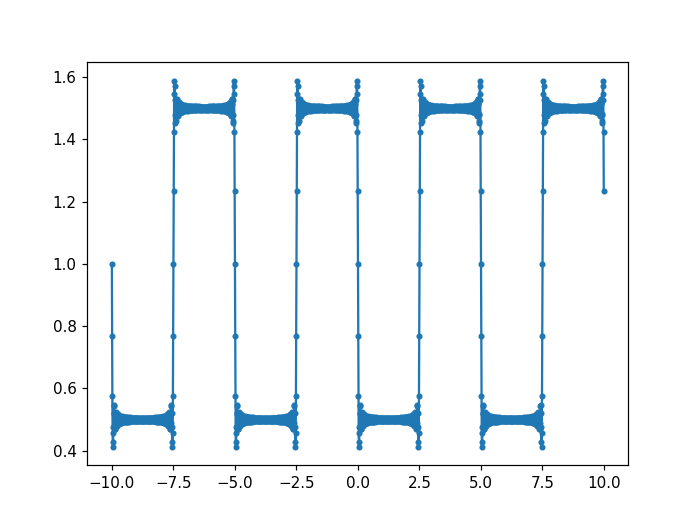

In [54]:
plt.plot(t,y,marker='.')

In [57]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9
